<a href="https://colab.research.google.com/github/nasgormaniac/tomato-disease-classification-pcd/blob/main/Tomato_Disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tomato Disease Classification

## Persiapan

### Impor Dependensi

In [ ]:
!pip install -q git+https://github.com/pecintakeju/ultralyticsAccThresholding.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 617.0/617.0 kB 6.9 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo mode=checks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 393, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.10/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are ('train', 'val', 'predict', 'export', 'track', 'benchmark').

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of ('detect', 'segment', 'classify', 'pose')
                MODE (required) is one of ('train', 'val', 'predict', 'export', 'track', 'benchmark')
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at https://d

In [ ]:
# cek struktur model

model = YOLO('yolov8n-cls')
model

100%|██████████| 5.28M/5.28M [00:00<00:00, 139MB/s]


YOLO(
  (model): ClassificationModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_

### Impor Dataset

In [ ]:
# upload your Kaggle API key here
from google.colab import files
data = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!pip install -q kaggle
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d cookiefinder/tomato-disease-multiple-sources

100% 1.37G/1.37G [00:22<00:00, 58.1MB/s]
100% 1.37G/1.37G [00:22<00:00, 64.5MB/s]


In [ ]:
!unzip tomato-disease-multiple-sources.zip

### Distribusi Data

In [ ]:
# spasi di nama folder spider_mites Two spider mites diganti jadi ""

!mkdir dataset
!mkdir test

!mv /content/valid /content/val

!mv '/content/train' '/content/dataset'
!mv '/content/test' '/content/dataset'
!mv '/content/val' '/content/dataset'

In [ ]:
!mv /content/dataset/val/Bacterial_spot/* /content/dataset/train/Bacterial_spot/
!mv /content/dataset/val/Early_blight/* /content/dataset/train/Early_blight/
!mv /content/dataset/val/Late_blight/* /content/dataset/train/Late_blight/
!mv /content/dataset/val/Leaf_Mold/* /content/dataset/train/Leaf_Mold/
!mv /content/dataset/val/Septoria_leaf_spot/* /content/dataset/train/Septoria_leaf_spot/
!mv /content/dataset/val/Spider_mites_Two-spotted_spider_mite/* /content/dataset/train/Spider_mites_Two-spotted_spider_mite/
!mv /content/dataset/val/Target_Spot/* /content/dataset/train/Target_Spot/
!mv /content/dataset/val/Tomato_Yellow_Leaf_Curl_Virus/* /content/dataset/train/Tomato_Yellow_Leaf_Curl_Virus/
!mv /content/dataset/val/Tomato_mosaic_virus/* /content/dataset/train/Tomato_mosaic_virus/
!mv /content/dataset/val/healthy/* /content/dataset/train/healthy/
!mv /content/dataset/val/powdery_mildew/* /content/dataset/train/powdery_mildew/

In [ ]:
!rm -r /content/dataset/train/.ipynb_checkpoints
!rm -r /content/dataset/val/.ipynb_checkpoints

In [ ]:
#copy foldernya saja dari train ke val dan test
import os

dir_to_copy = '/content/dataset/train'
to_dir1 = '/content/dataset/test'

for nama_folder in os.listdir(dir_to_copy):
  !mkdir $to_dir1/$nama_folder

In [ ]:
# Bagi untuk train : val : test = 7 : 2 : 1
import random
import shutil

# Path ke folder asal
source_dir = '/content/dataset/train'

# Path ke folder tujuan
train_dir = '/content/dataset/train'
val_dir = '/content/dataset/val'
test_dir = '/content/dataset/test'

# Persentase pembagian
train_split = 0.7
val_split = 0.2
test_split = 0.1

# Loop melalui setiap folder di dalam source_dir
for folder_name in os.listdir(source_dir):
    folder_path = os.path.join(source_dir, folder_name)

    # Pastikan folder_path adalah direktori
    if os.path.isdir(folder_path):
        images = os.listdir(folder_path)
        total_images = len(images)

        # Hitung jumlah gambar untuk setiap split
        num_train = int(total_images * train_split)
        num_val = int(total_images * val_split)
        num_test = int(total_images * test_split)

        # Acak urutan gambar
        random.shuffle(images)

        # Bagi gambar ke dalam setiap folder
        train_images = images[:num_train]
        val_images = images[num_train:num_train + num_val]
        test_images = images[num_train + num_val:num_train + num_val + num_test]

        # Pindahkan gambar ke folder tujuan
        for image in train_images:
            shutil.move(os.path.join(folder_path, image), os.path.join(train_dir, folder_name, image))
        for image in val_images:
            shutil.move(os.path.join(folder_path, image), os.path.join(val_dir, folder_name, image))
        for image in test_images:
            shutil.move(os.path.join(folder_path, image), os.path.join(test_dir, folder_name, image))

### Cek Jumlah Data Tiap Folder

In [ ]:
#cek isi tiap folder train, val, test
base_dir = '/content/dataset'

for folder_utama in os.listdir(base_dir):
  folder_path = os.path.join(base_dir, folder_utama)

  if os.path.isdir(folder_path):
    for class_folder in os.listdir(folder_path):
      data_folder = os.path.join(folder_path, class_folder)

      if os.path.isdir(data_folder):
        file_count = len(os.listdir(data_folder))
        print(f'Folder {data_folder} berisi {file_count} file.\n')

Folder /content/dataset/val/powdery_mildew berisi 251 file.

Folder /content/dataset/val/healthy berisi 771 file.

Folder /content/dataset/val/Septoria_leaf_spot berisi 725 file.

Folder /content/dataset/val/Tomato_Yellow_Leaf_Curl_Virus berisi 507 file.

Folder /content/dataset/val/Leaf_Mold berisi 698 file.

Folder /content/dataset/val/Bacterial_spot berisi 711 file.

Folder /content/dataset/val/Spider_mites_Two-spotted_spider_mite berisi 436 file.

Folder /content/dataset/val/Target_Spot berisi 456 file.

Folder /content/dataset/val/Tomato_mosaic_virus berisi 547 file.

Folder /content/dataset/val/Early_blight berisi 619 file.

Folder /content/dataset/val/Late_blight berisi 781 file.

Folder /content/dataset/train/powdery_mildew berisi 880 file.

Folder /content/dataset/train/healthy berisi 2701 file.

Folder /content/dataset/train/Septoria_leaf_spot berisi 2541 file.

Folder /content/dataset/train/Tomato_Yellow_Leaf_Curl_Virus berisi 1777 file.

Folder /content/dataset/train/Leaf_M

## Nano Model

In [ ]:
!yolo task=classify mode=train model=yolov8n-cls.pt data=/content/dataset epochs=30 imgsz=224 patience=3

New https://pypi.org/project/ultralytics/8.0.205 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.180 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/dataset, epochs=30, patience=3, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnosti

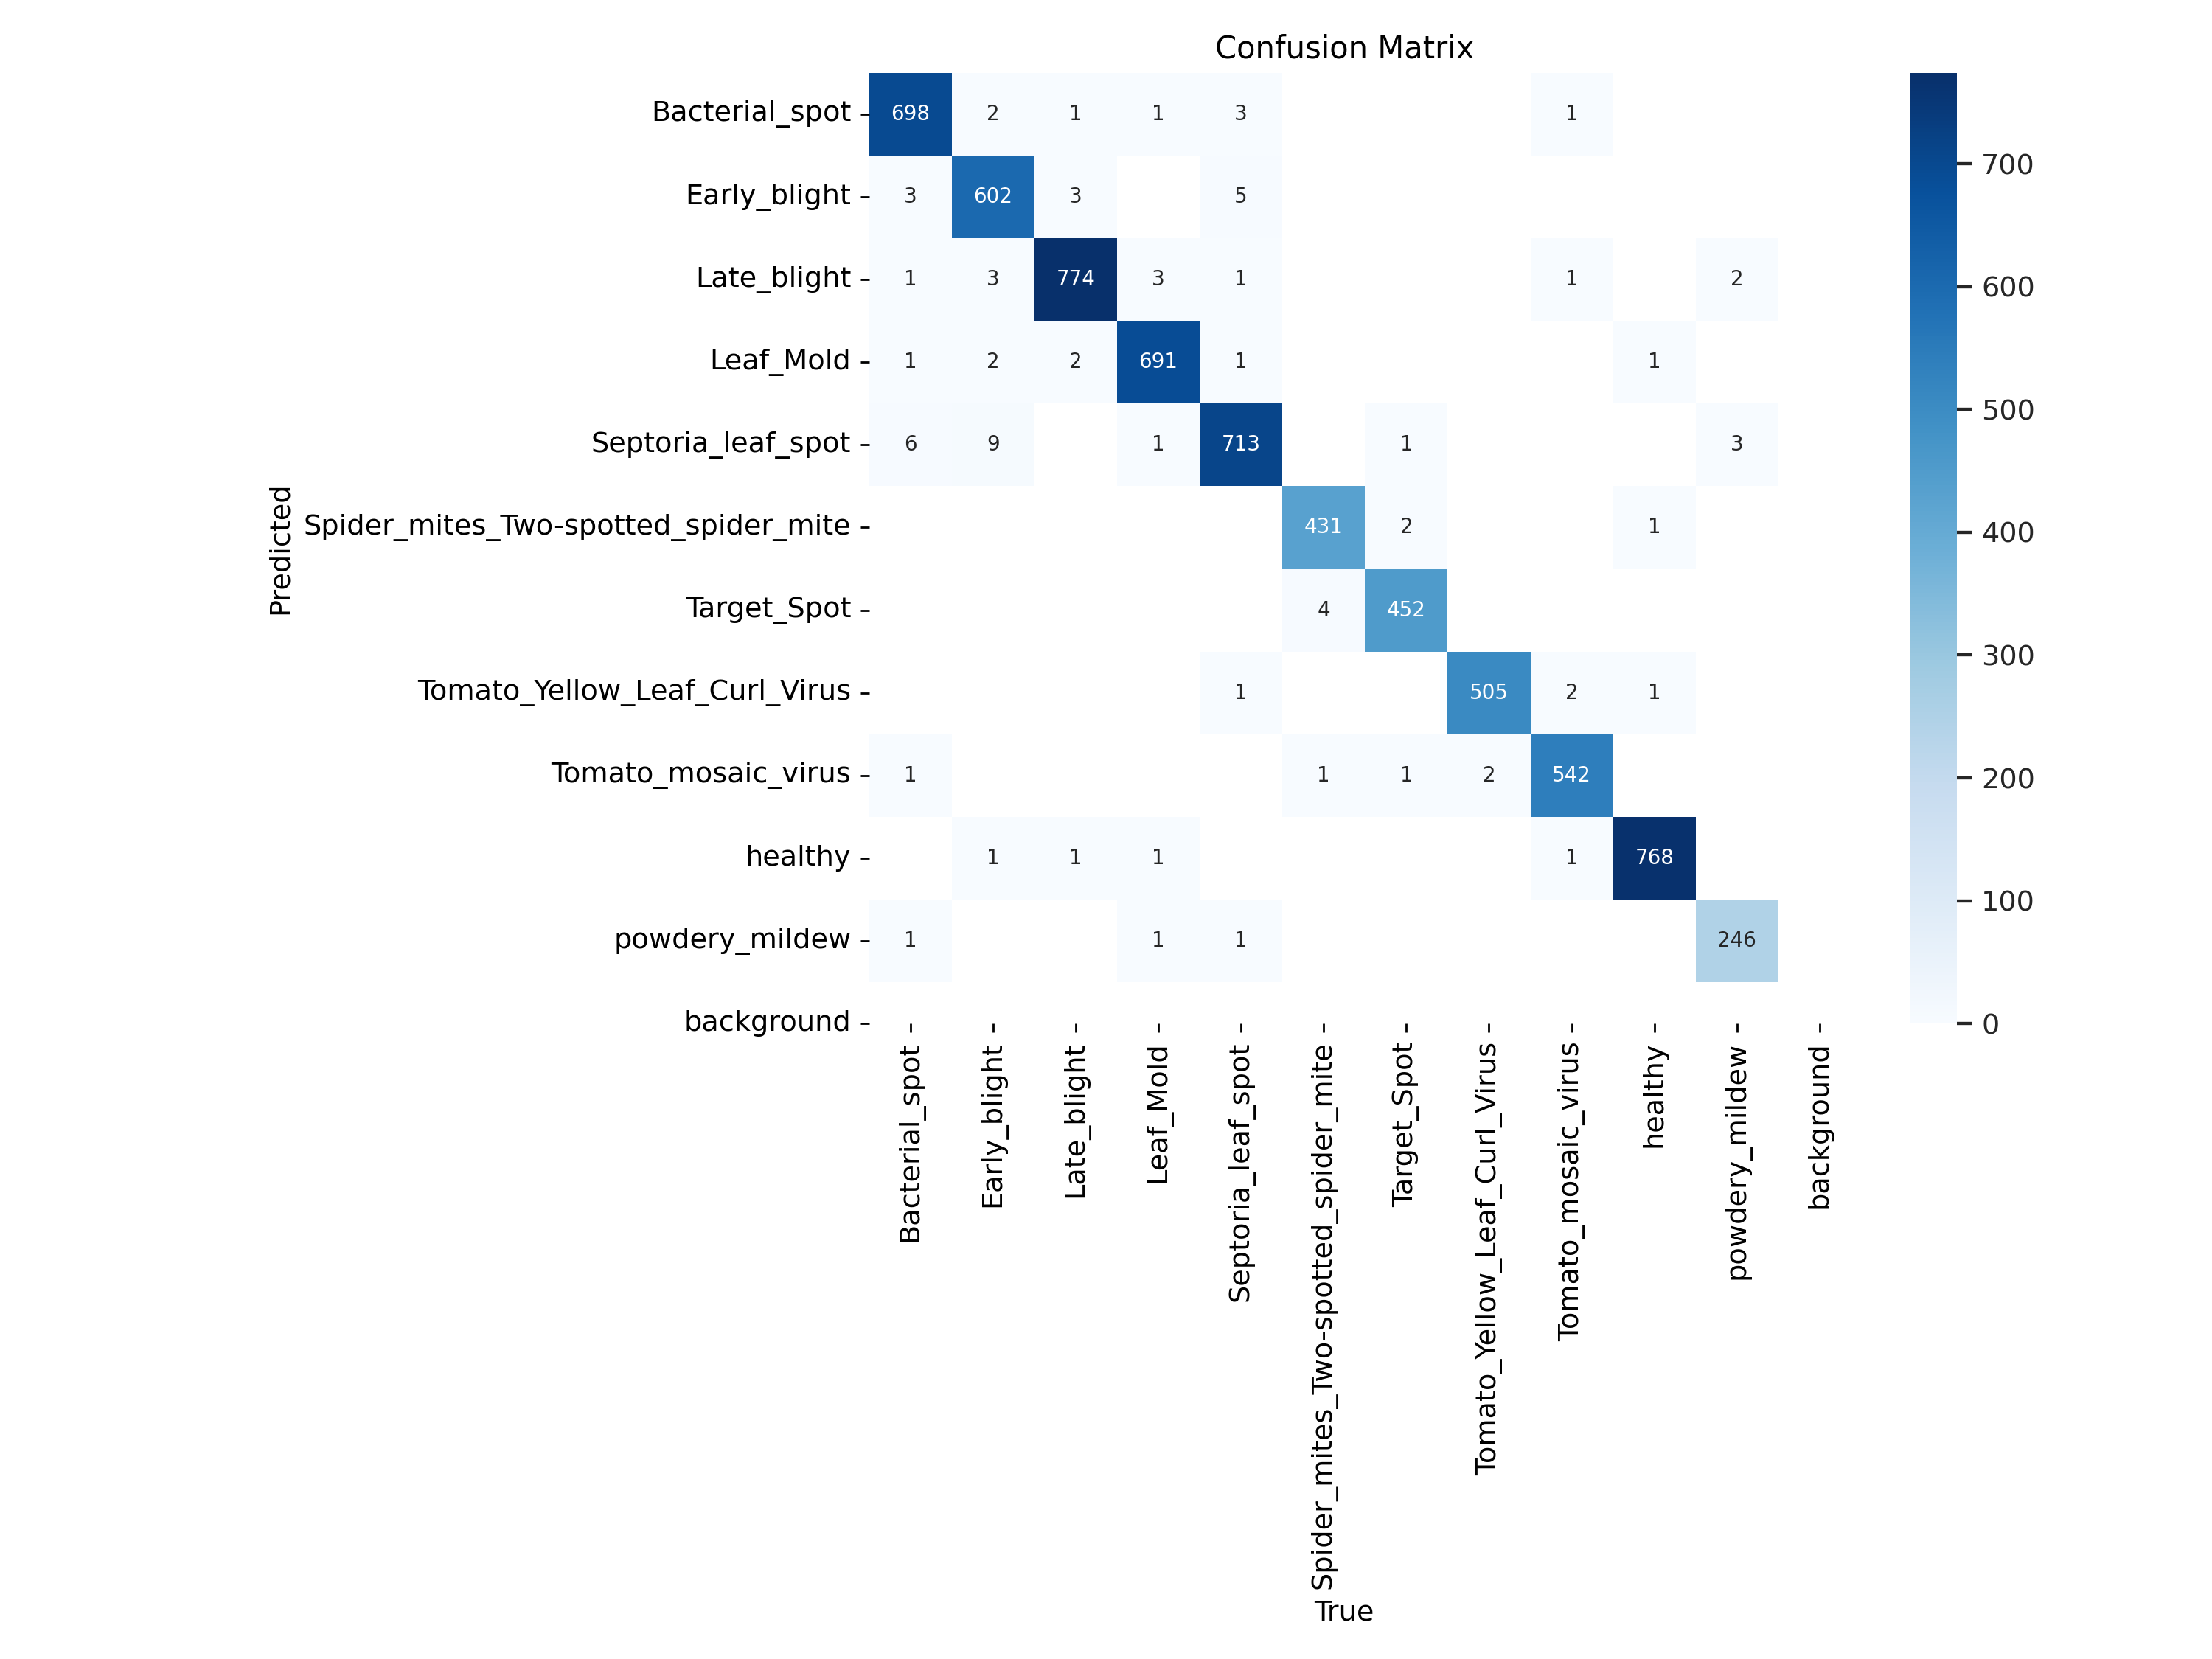

In [ ]:
Image(filename=f'/content/runs/classify/train/confusion_matrix.png', width=600)

In [ ]:
import pandas as pd
df = pd.read_csv('/content/runs/classify/train/results.csv')
df

,epoch,train/loss,metrics/accuracy_top1,metrics/accuracy_top5,val/loss,lr/pg0,lr/pg1,lr/pg2
0,1,0.35930,0.81406,0.98847,0.90960,0.003331,0.003331,0.003331
1,2,0.12780,0.88250,0.99400,0.84647,0.006444,0.006444,0.006444
2,3,0.09168,0.92002,0.99708,0.82089,0.009338,0.009338,0.009338
3,4,0.07887,0.93756,0.99769,0.81164,0.009010,0.009010,0.009010
4,5,0.06233,0.93417,0.99831,0.81097,0.009010,0.009010,0.009010
5,6,0.05200,0.94602,0.99846,0.80352,0.008680,0.008680,0.008680
6,7,0.04485,0.96263,0.99923,0.79518,0.008350,0.008350,0.008350
7,8,0.03979,0.96340,0.99938,0.79221,0.008020,0.008020,0.008020
8,9,0.03249,0.97062,0.99923,0.78943,0.007690,0.007690,0.007690
9,10,0.03030,0.97016,0.99908,0.78882,0.007360,0.007360,0.007360


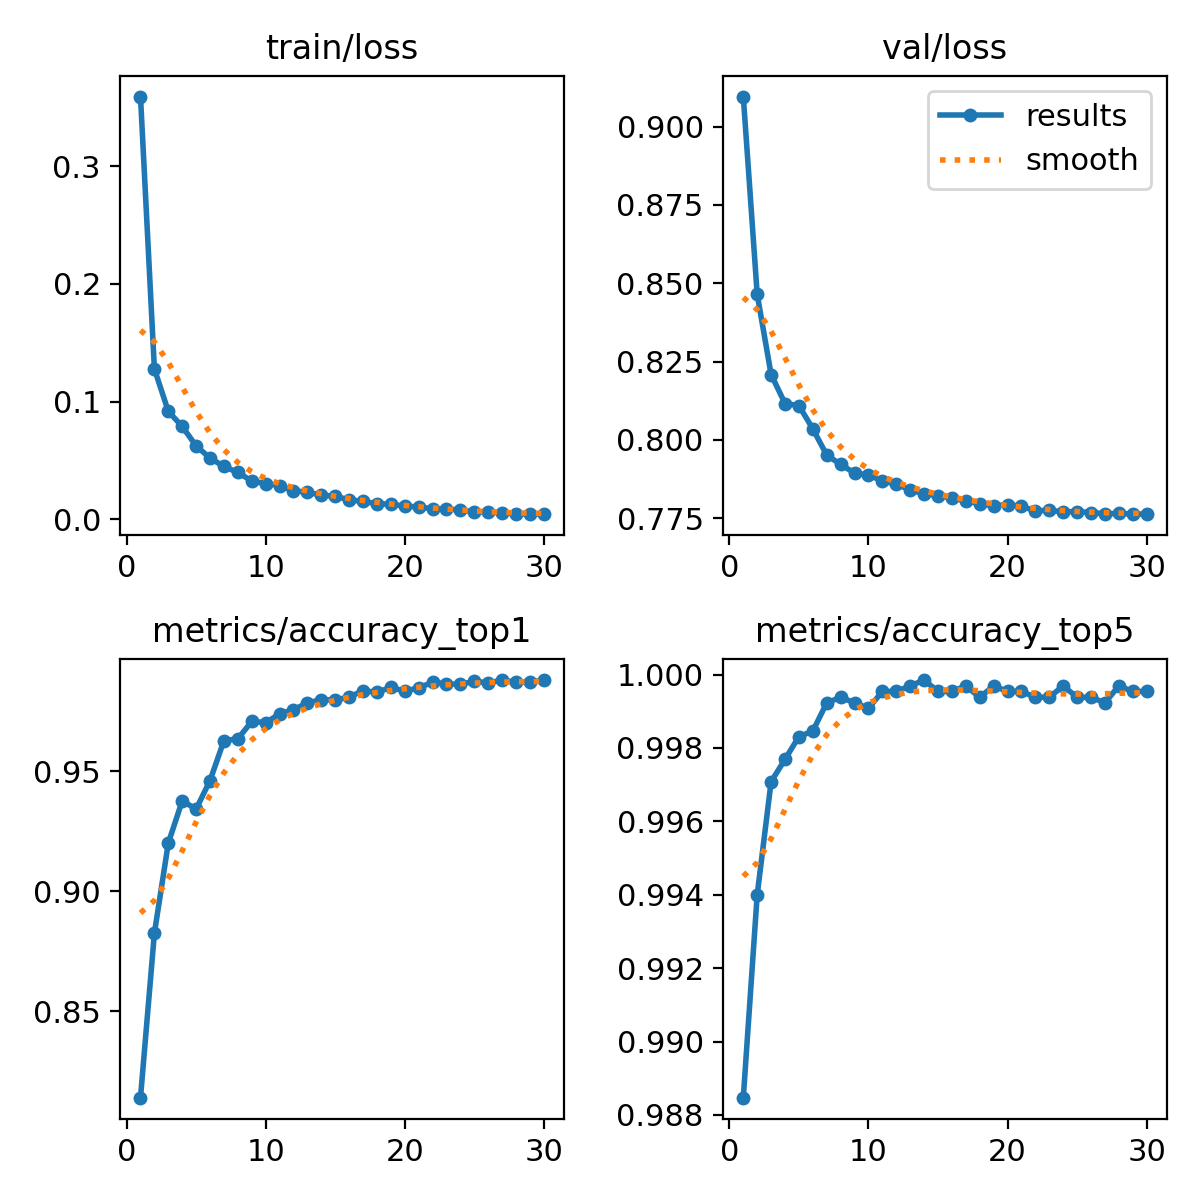

In [ ]:
Image(filename=f'/content/runs/classify/train/results.png', width=600)

In [ ]:
best_model = YOLO('/content/runs/classify/train/weights/best.pt')
metrics_val = best_model.val(data='/content/dataset', split='val')

Ultralytics YOLOv8.0.180 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1448971 parameters, 0 gradients
train: /content/dataset/train... found 22786 images in 11 classes ✅ 
val: /content/dataset/val... found 6502 images in 11 classes ✅ 
test: /content/dataset/test... found 3247 images in 11 classes ✅ 
val: Scanning /content/dataset/val... 6502 images, 0 corrupt: 100%|██████████| 6502/6502 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/dataset/val/Leaf_Mold/BM_(9).jpg: corrupt JPEG restored and saved
               classes   top1_acc   top5_acc: 100%|██████████| 407/407 [00:23<00:00, 16.97it/s]
                   all      0.988          1
Speed: 0.1ms preprocess, 0.6ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val


In [ ]:
#calculating performance metrics for each class on test data
cf_matrix = metrics_val.confusion_matrix.matrix

classes = ['Bacterial Spot',
           'Early Blight',
           'Late Blight',
           'Leaf Mold',
           'Leaf Spot',
           'Spider Mites',
           'Target Spot',
           'Curl Virus',
           'Mosaic Virus',
           'Healthy',
           'Powdery Mildew']

TP_arr = []
FP_arr = []
FN_arr = []
precision_arr = []
recall_arr = []
f1_arr = []

rows, cols = cf_matrix.shape

for i in range(rows):
  tp = 0
  fp = 0
  fn = 0
  for j in range(cols):
    if(i==j):
      tp = cf_matrix[i,j]
    else:
      fp += cf_matrix[i, j]
      fn += cf_matrix[j, i]
  TP_arr.append(tp)
  FP_arr.append(fp)
  FN_arr.append(fn)

for i in range(len(TP_arr)):
  precision_arr.append(TP_arr[i] / (TP_arr[i] + FP_arr[i]))
  recall_arr.append(TP_arr[i] / (TP_arr[i] + FN_arr[i]))
  f1_arr.append(2 * (precision_arr[i] * recall_arr[i]) / (precision_arr[i] + recall_arr[i]))

print('Val data metrics')

for i in range(len(classes)):
  print(f'{classes[i]}- ')
  print(f'Precision : {precision_arr[i]:.3f}')
  print(f'Recall : {recall_arr[i]:.3f}')
  print(f'F1-Score : {f1_arr[i]:.3f}\n')

Val data metrics
Bacterial Spot- 
Precision : 0.989
Recall : 0.982
F1-Score : 0.985

Early Blight- 
Precision : 0.982
Recall : 0.973
F1-Score : 0.977

Late Blight- 
Precision : 0.986
Recall : 0.991
F1-Score : 0.989

Leaf Mold- 
Precision : 0.990
Recall : 0.990
F1-Score : 0.990

Leaf Spot- 
Precision : 0.973
Recall : 0.983
F1-Score : 0.978

Spider Mites- 
Precision : 0.993
Recall : 0.989
F1-Score : 0.991

Target Spot- 
Precision : 0.991
Recall : 0.991
F1-Score : 0.991

Curl Virus- 
Precision : 0.992
Recall : 0.996
F1-Score : 0.994

Mosaic Virus- 
Precision : 0.991
Recall : 0.991
F1-Score : 0.991

Healthy- 
Precision : 0.995
Recall : 0.996
F1-Score : 0.995

Powdery Mildew- 
Precision : 0.988
Recall : 0.980
F1-Score : 0.984



In [ ]:
!zip -r /content/model_nano.zip /content/runs/classify

In [ ]:
files.download('/content/model_nano.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Small Model

In [ ]:
!yolo task=classify mode=train model=yolov8s-cls.pt data=/content/dataset epochs=30 imgsz=224 patience=3

100% 12.2M/12.2M [00:00<00:00, 288MB/s]
New https://pypi.org/project/ultralytics/8.0.206 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.180 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8s-cls.pt, data=/content/dataset, epochs=30, patience=3, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None,

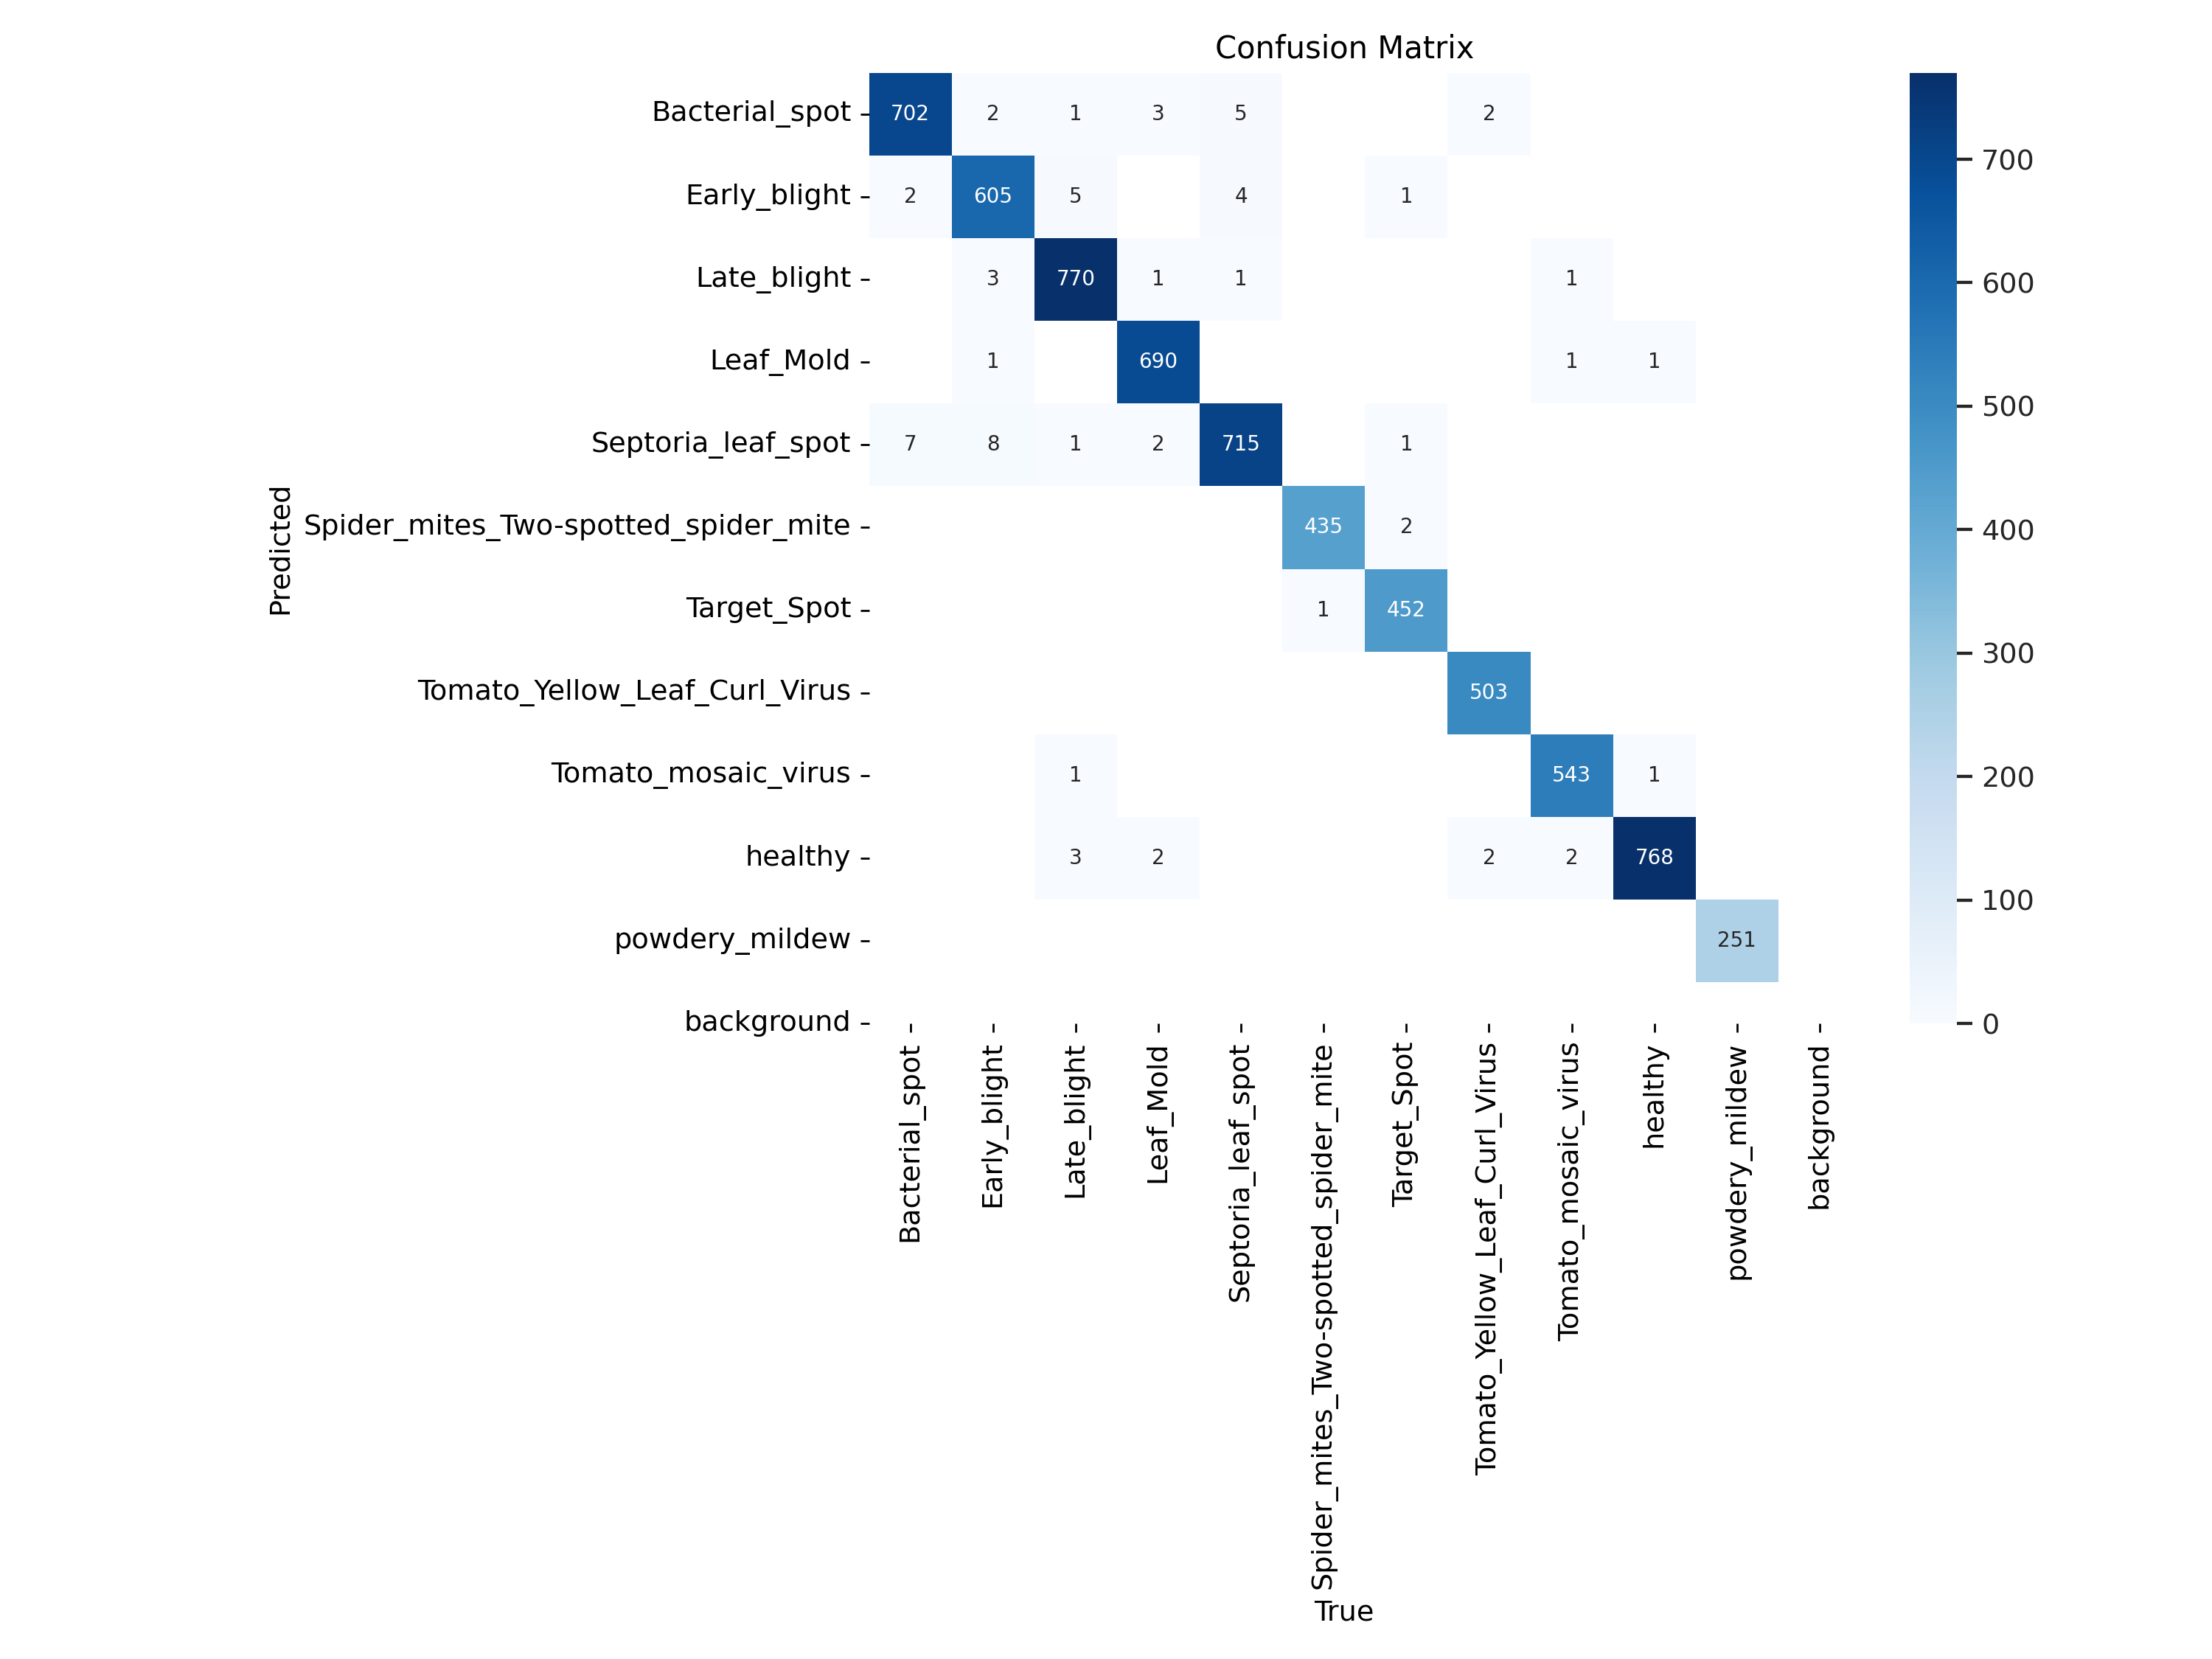

In [ ]:
Image(filename=f'/content/runs/classify/train/confusion_matrix.png', width=600)

In [ ]:
import pandas as pd
df = pd.read_csv('/content/runs/classify/train/results.csv')
df

,epoch,train/loss,metrics/accuracy_top1,metrics/accuracy_top5,val/loss,lr/pg0,lr/pg1,lr/pg2
0,1,0.35506,0.82818,0.98954,0.89842,0.003331,0.003331,0.003331
1,2,0.11471,0.91463,0.99677,0.82868,0.006444,0.006444,0.006444
2,3,0.07511,0.92832,0.99739,0.81644,0.009338,0.009338,0.009338
3,4,0.06371,0.94478,0.99846,0.80493,0.009010,0.009010,0.009010
4,5,0.04969,0.95462,0.99908,0.79887,0.009010,0.009010,0.009010
5,6,0.03810,0.96477,0.99892,0.79256,0.008680,0.008680,0.008680
6,7,0.03220,0.96908,0.99938,0.78907,0.008350,0.008350,0.008350
7,8,0.02655,0.97308,0.99923,0.78641,0.008020,0.008020,0.008020
8,9,0.02386,0.97247,0.99908,0.78638,0.007690,0.007690,0.007690
9,10,0.02174,0.97631,0.99938,0.78542,0.007360,0.007360,0.007360


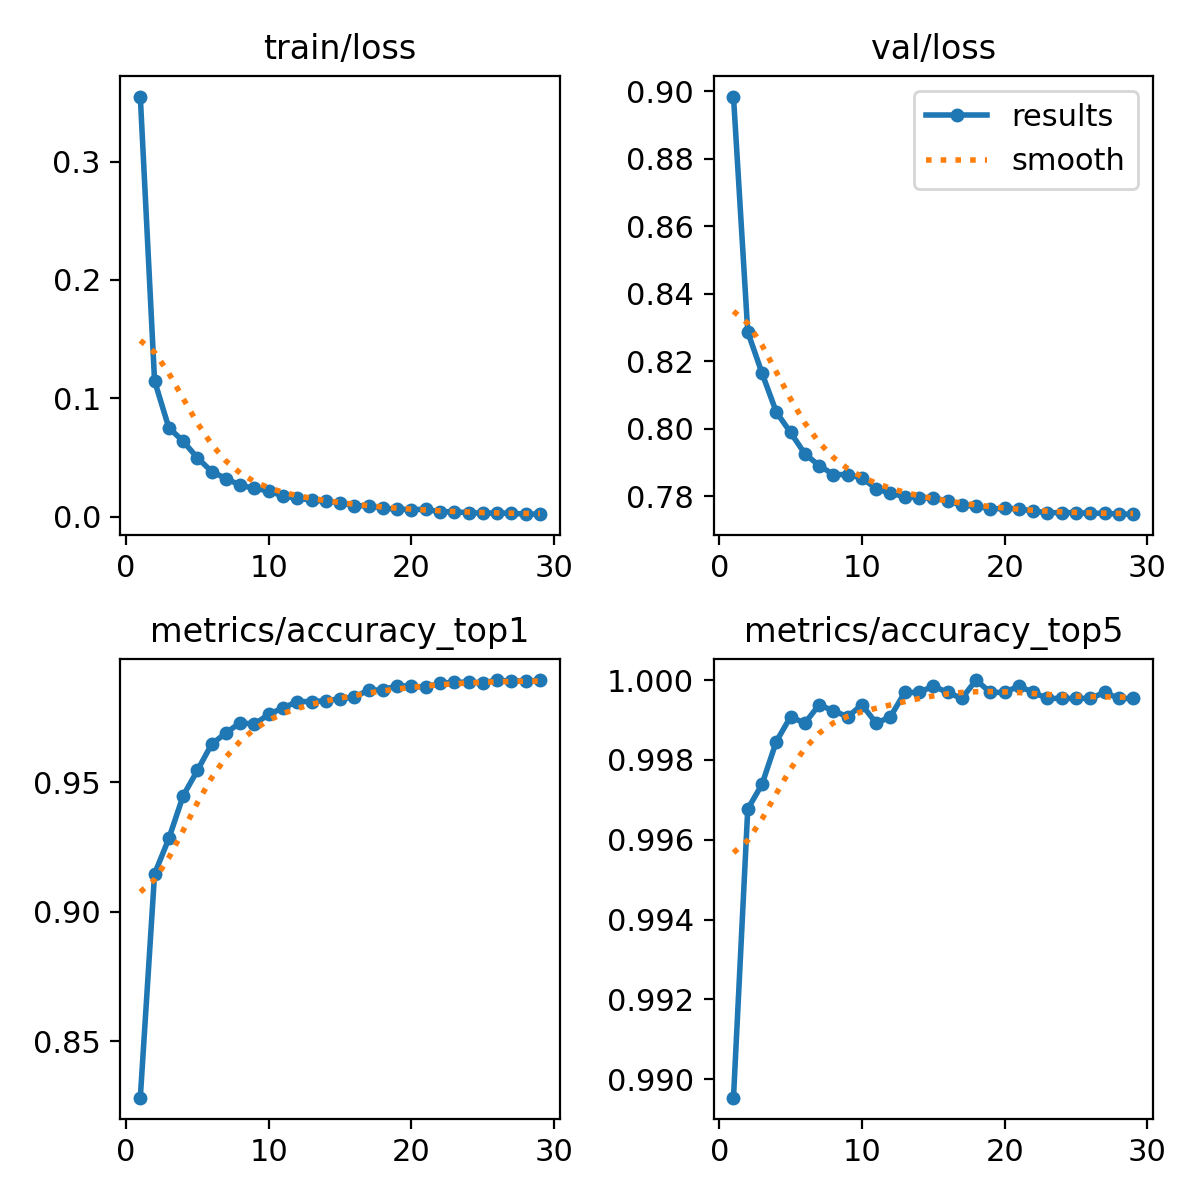

In [ ]:
Image(filename=f'/content/runs/classify/train/results.png', width=600)

In [ ]:
best_model = YOLO('/content/runs/classify/train/weights/best.pt')
metrics_val = best_model.val(data='/content/dataset', split='val')

Ultralytics YOLOv8.0.180 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-cls summary (fused): 73 layers, 5089291 parameters, 0 gradients
train: /content/dataset/train... found 22786 images in 11 classes ✅ 
val: /content/dataset/val... found 6502 images in 11 classes ✅ 
test: /content/dataset/test... found 3247 images in 11 classes ✅ 
val: Scanning /content/dataset/val... 6501 images, 1 corrupt: 100%|██████████| 6501/6501 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/dataset/val/healthy/HL_(336).png: ignoring corrupt image/label: Truncated File Read
               classes   top1_acc   top5_acc: 100%|██████████| 407/407 [00:23<00:00, 17.59it/s]
                   all       0.99          1
Speed: 0.1ms preprocess, 1.0ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val


In [ ]:
#calculating performance metrics for each class on test data
cf_matrix = metrics_val.confusion_matrix.matrix

classes = ['Bacterial Spot',
           'Early Blight',
           'Late Blight',
           'Leaf Mold',
           'Leaf Spot',
           'Spider Mites',
           'Target Spot',
           'Curl Virus',
           'Mosaic Virus',
           'Healthy',
           'Powdery Mildew']

TP_arr = []
FP_arr = []
FN_arr = []
precision_arr = []
recall_arr = []
f1_arr = []

rows, cols = cf_matrix.shape

for i in range(rows):
  tp = 0
  fp = 0
  fn = 0
  for j in range(cols):
    if(i==j):
      tp = cf_matrix[i,j]
    else:
      fp += cf_matrix[i, j]
      fn += cf_matrix[j, i]
  TP_arr.append(tp)
  FP_arr.append(fp)
  FN_arr.append(fn)

for i in range(len(TP_arr)):
  precision_arr.append(TP_arr[i] / (TP_arr[i] + FP_arr[i]))
  recall_arr.append(TP_arr[i] / (TP_arr[i] + FN_arr[i]))
  f1_arr.append(2 * (precision_arr[i] * recall_arr[i]) / (precision_arr[i] + recall_arr[i]))

print('Val data metrics')

for i in range(len(classes)):
  print(f'{classes[i]}- ')
  print(f'Precision : {precision_arr[i]:.3f}')
  print(f'Recall : {recall_arr[i]:.3f}')
  print(f'F1-Score : {f1_arr[i]:.3f}\n')

Val data metrics
Bacterial Spot- 
Precision : 0.982
Recall : 0.987
F1-Score : 0.985

Early Blight- 
Precision : 0.981
Recall : 0.977
F1-Score : 0.979

Late Blight- 
Precision : 0.992
Recall : 0.986
F1-Score : 0.989

Leaf Mold- 
Precision : 0.996
Recall : 0.989
F1-Score : 0.992

Leaf Spot- 
Precision : 0.974
Recall : 0.986
F1-Score : 0.980

Spider Mites- 
Precision : 0.995
Recall : 0.995
F1-Score : 0.995

Target Spot- 
Precision : 0.996
Recall : 0.991
F1-Score : 0.993

Curl Virus- 
Precision : 1.000
Recall : 0.992
F1-Score : 0.996

Mosaic Virus- 
Precision : 0.996
Recall : 0.993
F1-Score : 0.995

Healthy- 
Precision : 0.988
Recall : 0.997
F1-Score : 0.993

Powdery Mildew- 
Precision : 1.000
Recall : 1.000
F1-Score : 1.000



In [ ]:
!zip -r /content/model_small.zip /content/runs/classify

In [ ]:
files.download('/content/model_small.zip')

## Medium Model

In [ ]:
!yolo task=classify mode=train model=yolov8m-cls.pt data=/content/dataset epochs=30 imgsz=224 patience=3

100% 32.7M/32.7M [00:00<00:00, 274MB/s]
New https://pypi.org/project/ultralytics/8.0.206 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.180 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8m-cls.pt, data=/content/dataset, epochs=30, patience=3, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None,

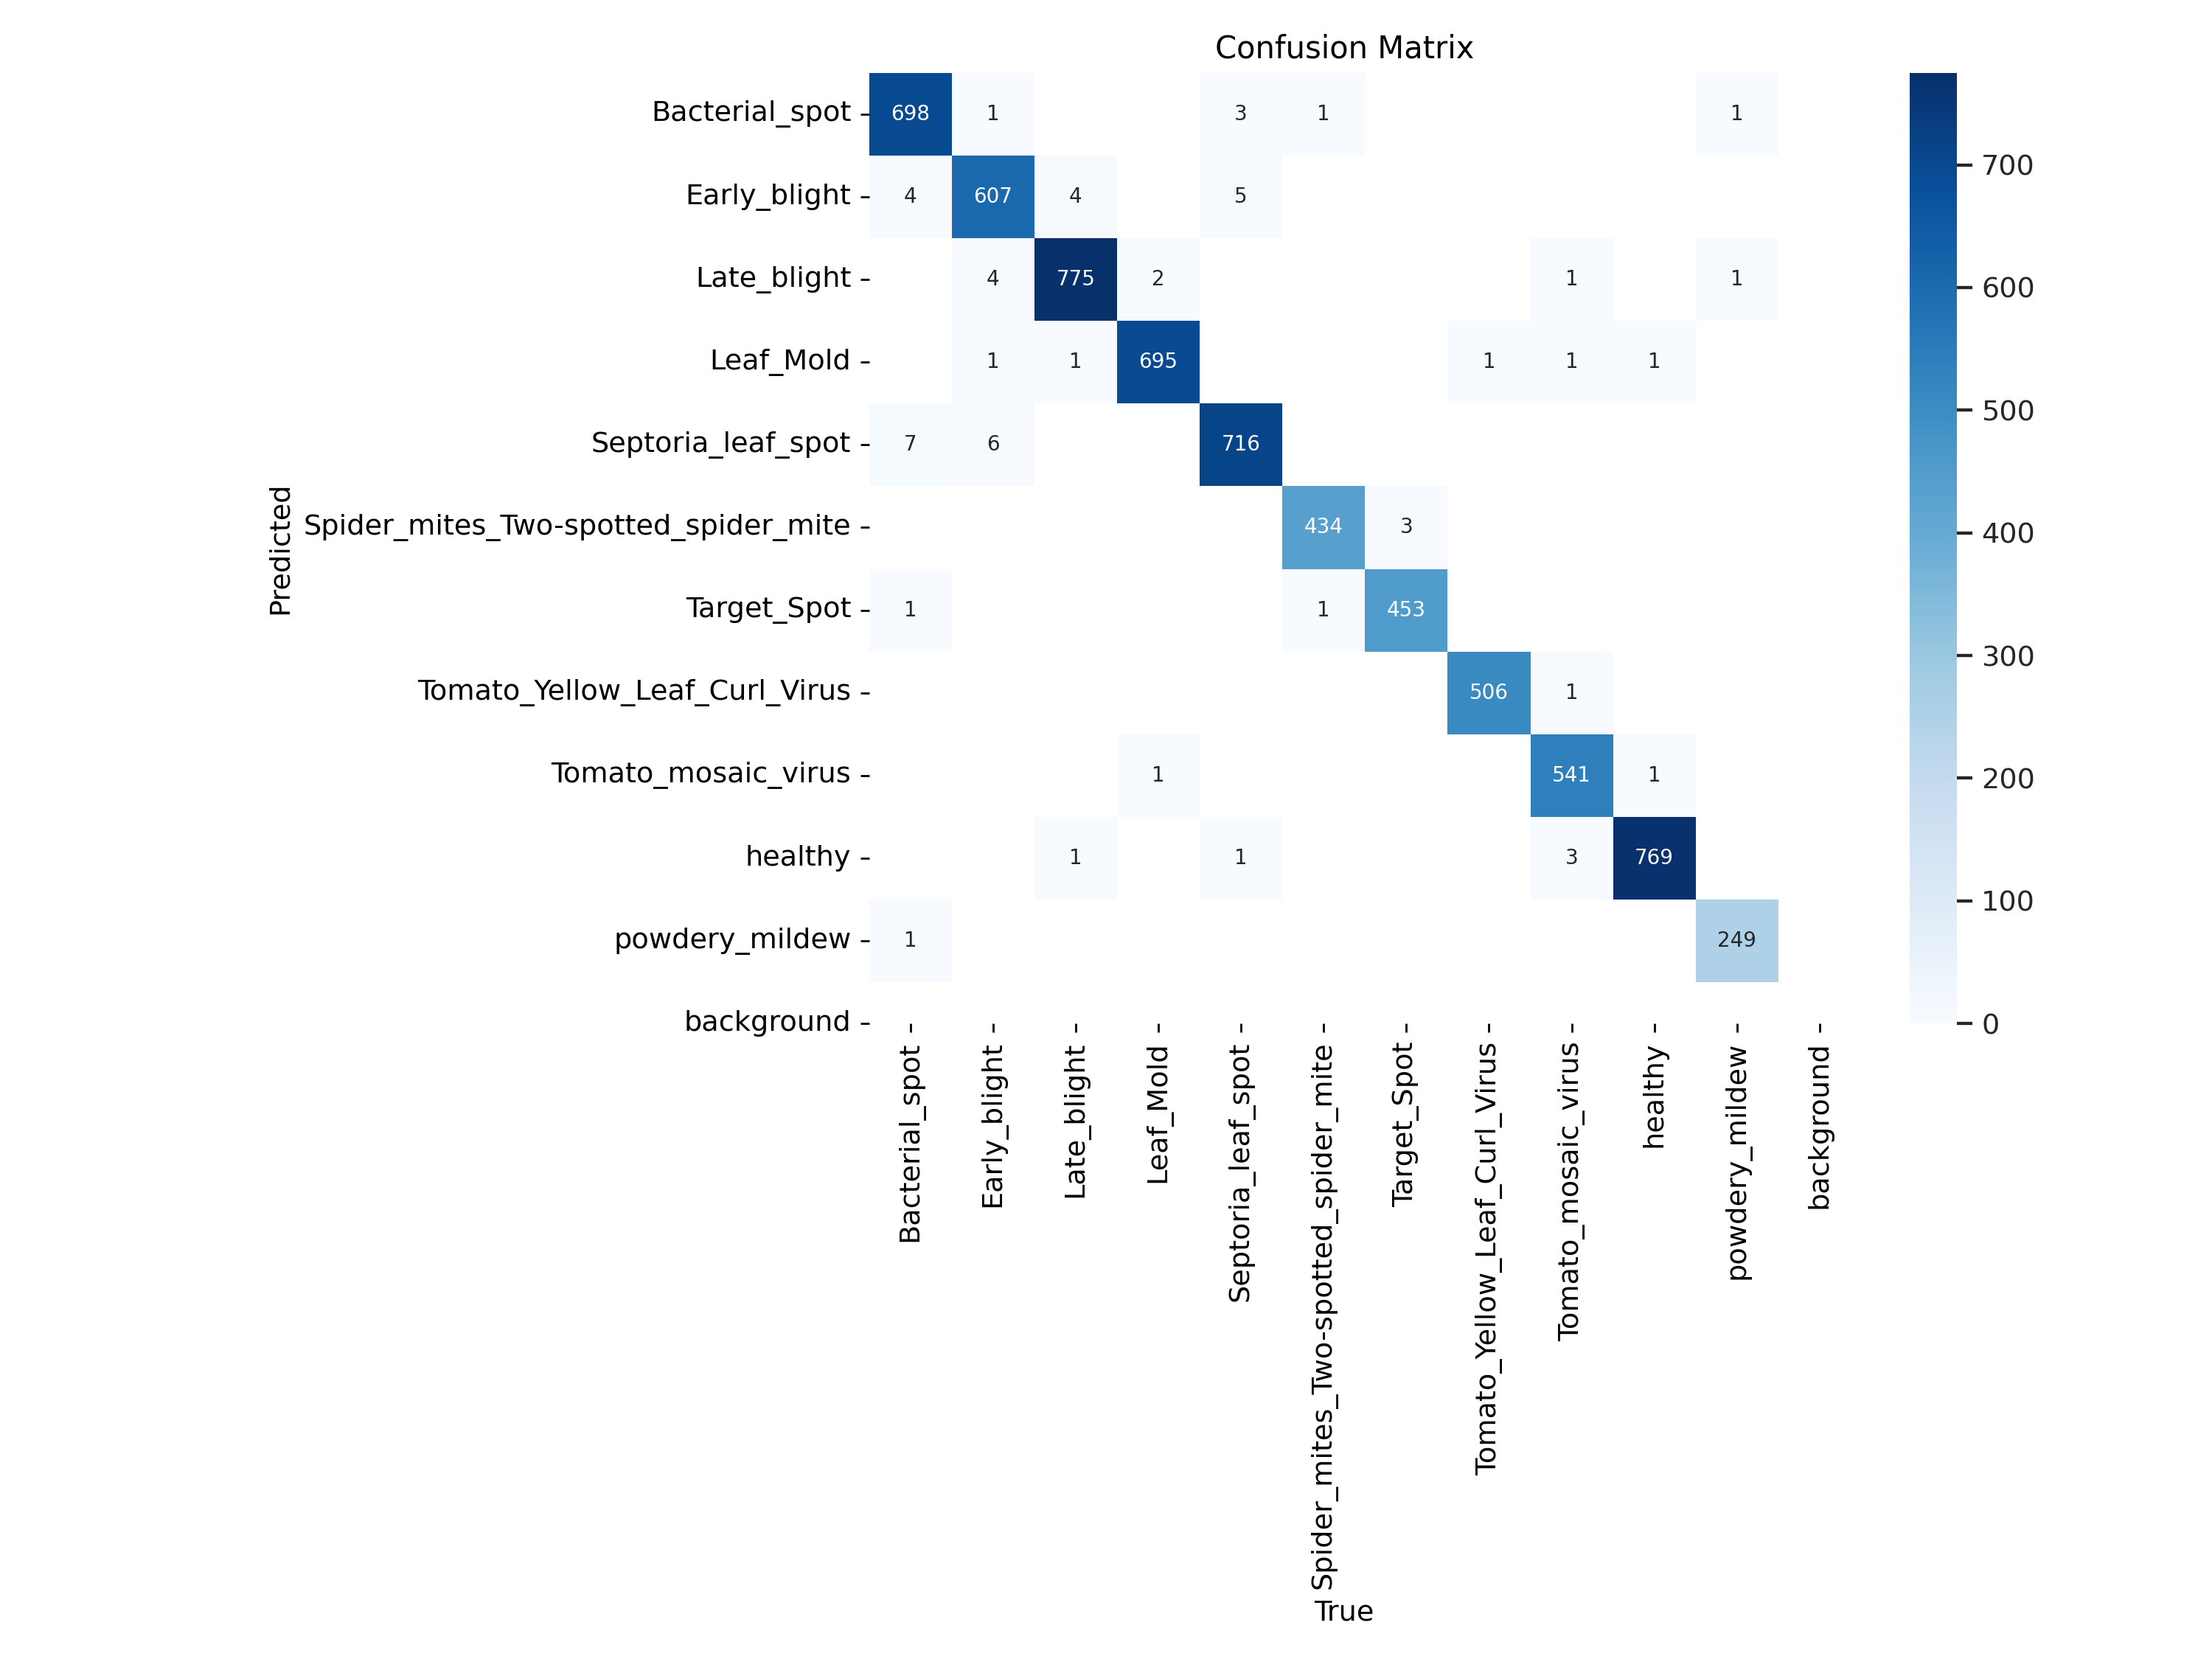

In [ ]:
Image(filename=f'/content/runs/classify/train/confusion_matrix.png', width=600)

In [ ]:
import pandas as pd
df = pd.read_csv('/content/runs/classify/train/results.csv')
df

,epoch,train/loss,metrics/accuracy_top1,metrics/accuracy_top5,val/loss,lr/pg0,lr/pg1,lr/pg2
0,1,0.35740,0.85558,0.99169,0.88171,0.003331,0.003331,0.003331
1,2,0.10563,0.93663,0.99769,0.81771,0.006444,0.006444,0.006444
2,3,0.06455,0.95232,0.99862,0.80439,0.009338,0.009338,0.009338
3,4,0.05322,0.95217,0.99877,0.80000,0.009010,0.009010,0.009010
4,5,0.03932,0.96094,0.99938,0.79381,0.009010,0.009010,0.009010
5,6,0.02971,0.97585,0.99954,0.78645,0.008680,0.008680,0.008680
6,7,0.02602,0.97539,0.99954,0.78499,0.008350,0.008350,0.008350
7,8,0.01795,0.97908,0.99969,0.78194,0.008020,0.008020,0.008020
8,9,0.01615,0.98170,0.99969,0.78114,0.007690,0.007690,0.007690
9,10,0.01376,0.98385,0.99969,0.77954,0.007360,0.007360,0.007360


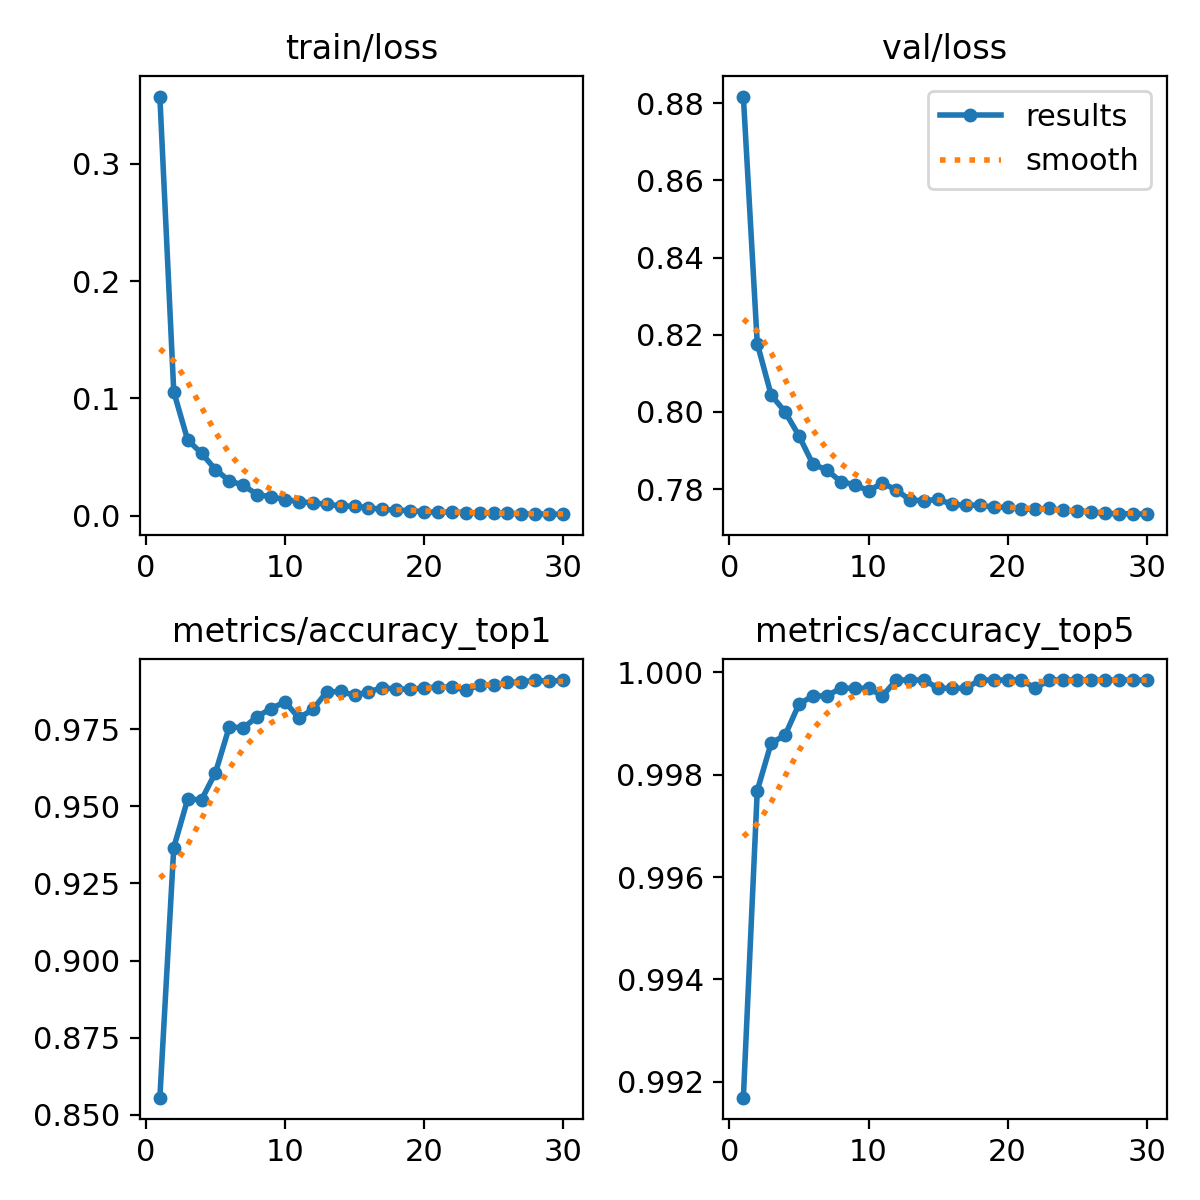

In [ ]:
Image(filename=f'/content/runs/classify/train/results.png', width=600)

In [ ]:
best_model = YOLO('/content/runs/classify/train/weights/best.pt')
metrics_val = best_model.val(data='/content/dataset', split='val')

Ultralytics YOLOv8.0.180 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-cls summary (fused): 103 layers, 15776747 parameters, 0 gradients
train: /content/dataset/train... found 22786 images in 11 classes ✅ 
val: /content/dataset/val... found 6502 images in 11 classes ✅ 
test: /content/dataset/test... found 3247 images in 11 classes ✅ 
val: Scanning /content/dataset/val... 6502 images, 0 corrupt: 100%|██████████| 6502/6502 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 407/407 [00:21<00:00, 18.67it/s]
                   all      0.991          1
Speed: 0.1ms preprocess, 1.6ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val


In [ ]:
#calculating performance metrics for each class on test data
cf_matrix = metrics_val.confusion_matrix.matrix

classes = ['Bacterial Spot',
           'Early Blight',
           'Late Blight',
           'Leaf Mold',
           'Leaf Spot',
           'Spider Mites',
           'Target Spot',
           'Curl Virus',
           'Mosaic Virus',
           'Healthy',
           'Powdery Mildew']

TP_arr = []
FP_arr = []
FN_arr = []
precision_arr = []
recall_arr = []
f1_arr = []

rows, cols = cf_matrix.shape

for i in range(rows):
  tp = 0
  fp = 0
  fn = 0
  for j in range(cols):
    if(i==j):
      tp = cf_matrix[i,j]
    else:
      fp += cf_matrix[i, j]
      fn += cf_matrix[j, i]
  TP_arr.append(tp)
  FP_arr.append(fp)
  FN_arr.append(fn)

for i in range(len(TP_arr)):
  precision_arr.append(TP_arr[i] / (TP_arr[i] + FP_arr[i]))
  recall_arr.append(TP_arr[i] / (TP_arr[i] + FN_arr[i]))
  f1_arr.append(2 * (precision_arr[i] * recall_arr[i]) / (precision_arr[i] + recall_arr[i]))

print('Val data metrics')

for i in range(len(classes)):
  print(f'{classes[i]}- ')
  print(f'Precision : {precision_arr[i]:.3f}')
  print(f'Recall : {recall_arr[i]:.3f}')
  print(f'F1-Score : {f1_arr[i]:.3f}\n')

Val data metrics
Bacterial Spot- 
Precision : 0.991
Recall : 0.982
F1-Score : 0.987

Early Blight- 
Precision : 0.979
Recall : 0.981
F1-Score : 0.980

Late Blight- 
Precision : 0.990
Recall : 0.992
F1-Score : 0.991

Leaf Mold- 
Precision : 0.993
Recall : 0.996
F1-Score : 0.994

Leaf Spot- 
Precision : 0.982
Recall : 0.988
F1-Score : 0.985

Spider Mites- 
Precision : 0.993
Recall : 0.995
F1-Score : 0.994

Target Spot- 
Precision : 0.996
Recall : 0.993
F1-Score : 0.995

Curl Virus- 
Precision : 0.998
Recall : 0.998
F1-Score : 0.998

Mosaic Virus- 
Precision : 0.996
Recall : 0.989
F1-Score : 0.993

Healthy- 
Precision : 0.994
Recall : 0.997
F1-Score : 0.995

Powdery Mildew- 
Precision : 0.996
Recall : 0.992
F1-Score : 0.994



In [ ]:
!zip -r /content/model_medium.zip /content/runs/classify

In [ ]:
files.download('/content/model_medium.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Prediksi

In [ ]:
import os

data_prediksi = "/content/dataset/test/"

for folder in os.listdir(data_prediksi):
    folder_path = os.path.join(data_prediksi, folder)
    !yolo task=classify mode=predict model=/content/runs/classify/train/weights/best.pt conf=0.25 source="{folder_path}"

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/classify/predict/*.jpg'):
  display(Image(filename=image_path, height=600))
  print("\n")

### Download Hasil Prediksi

In [ ]:
!mkdir hasil_prediksi

!mv '/content/runs/classify/predict' '/content/hasil_prediksi'
!mv '/content/runs/classify/predict2' '/content/hasil_prediksi'
!mv '/content/runs/classify/predict3' '/content/hasil_prediksi'
!mv '/content/runs/classify/predict4' '/content/hasil_prediksi'
!mv '/content/runs/classify/predict5' '/content/hasil_prediksi'
!mv '/content/runs/classify/predict6' '/content/hasil_prediksi'
!mv '/content/runs/classify/predict7' '/content/hasil_prediksi'
!mv '/content/runs/classify/predict8' '/content/hasil_prediksi'
!mv '/content/runs/classify/predict9' '/content/hasil_prediksi'
!mv '/content/runs/classify/predict10' '/content/hasil_prediksi'
!mv '/content/runs/classify/predict11' '/content/hasil_prediksi'

In [ ]:
!zip -r /content/predict.zip /content/hasil_prediksi

In [ ]:
files.download('/content/predict.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>